In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt

FRAME_DIR = "./frames"

def check_dir(frame_dir = "./frames"):
    os.makedirs(frame_dir , exist_ok = True)


def frame_capture(path , frame_dir = "./frames"): 
      
    video = cv2.VideoCapture(path) 
    count = 0
    success = 1
  
    while True: 
        success, image = video.read() 
        
        if not success:
            break
            
        cv2.imwrite(os.path.join(frame_dir , "{}.jpg").format(count) , image) 
        count += 1
  


In [13]:
check_dir()
frame_capture("./cartracking.mp4" , FRAME_DIR)

In [15]:
frames_files = sorted( os.listdir(FRAME_DIR) , key = lambda x : int(x.split('.')[0]))
frames = [ cv2.imread(os.path.join(FRAME_DIR , f)) for f in frames_files]
print("Total frames :: " , len(frames))

Total frames ::  1200


In [49]:
rows,cols,channels = frames[0].shape
print(rows , cols , channels)
noise = np.random.randint(low = -100 , high = 100 , size = (rows,cols,channels))

360 684 3


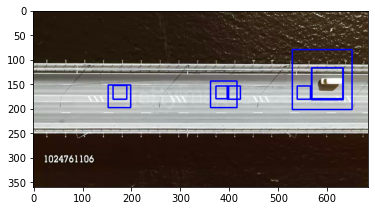

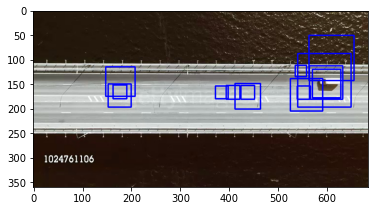

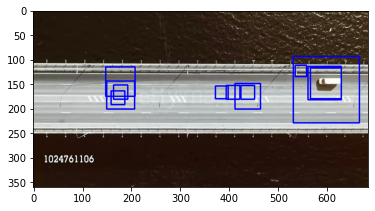

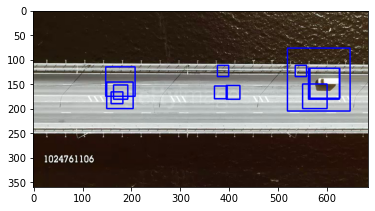

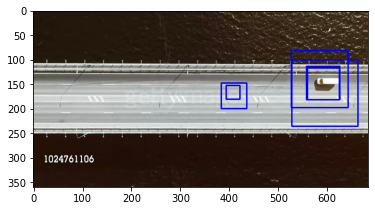

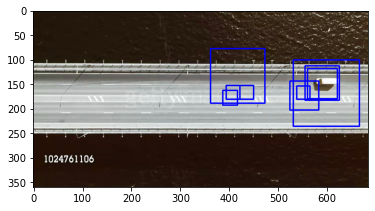

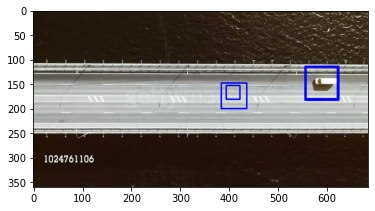

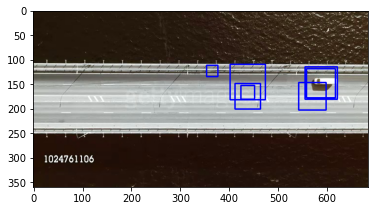

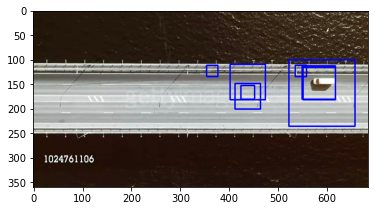

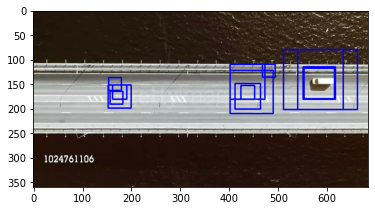

In [54]:
car_cascade = cv2.CascadeClassifier('cars.xml') 

for frame in frames[:10]:
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
  
    # Detects cars of different sizes in the input image 
    cars = car_cascade.detectMultiScale(gray, 1.1, 1) 
      
    # To draw a rectangle in each cars 
    for (x,y,w,h) in cars: 
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2) 
  
   # Display frames in a window  
    plt.imshow(frame) 
    plt.show()
    
   